**Problem Identification**

* The client has given a dataset and they want you to analyze the data and to segment it based on users spending score.
* You have to predict which customers belong to which group and who are the target customers, so that it make sense for marketing team and they plan their strategy accordingly.

**Approach**

* Reading and understanding the data, dealing with null values.
* Finding the insights from the data then visualization and drawing conclusion about age, annual income and spending score.
* Building a model using K-Means clustering.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),City
0,1,Male,19,15,39.0,New York
1,2,Male,21,15,81.0,Seattle
2,3,Female,20,16,6.0,Los Angeles.
3,4,Female,23,16,77.0,Chicago.
4,5,Female,31,17,40.0,Houston.
...,...,...,...,...,...,...
1175,1176,Female,47,88,73.0,Chicago.
1176,1177,Male,48,88,10.0,Houston.
1177,1178,Male,49,88,72.0,Phoenix.
1178,1179,Male,50,93,5.0,Philadelphia.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1180 entries, 0 to 1179
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              1180 non-null   int64  
 1   Gender                  1180 non-null   object 
 2   Age                     1180 non-null   int64  
 3   Annual Income (k$)      1180 non-null   int64  
 4   Spending Score (1-100)  942 non-null    float64
 5   City                    1180 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 55.4+ KB


In [4]:
df['Spending Score (1-100)'].isnull().sum()

238

In [5]:
df['Spending Score (1-100)'] = df['Spending Score (1-100)'].fillna(df['Spending Score (1-100)'].mean())
df['Spending Score (1-100)'] = df['Spending Score (1-100)'].astype(dtype='int32')

In [6]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'City'],
      dtype='object')

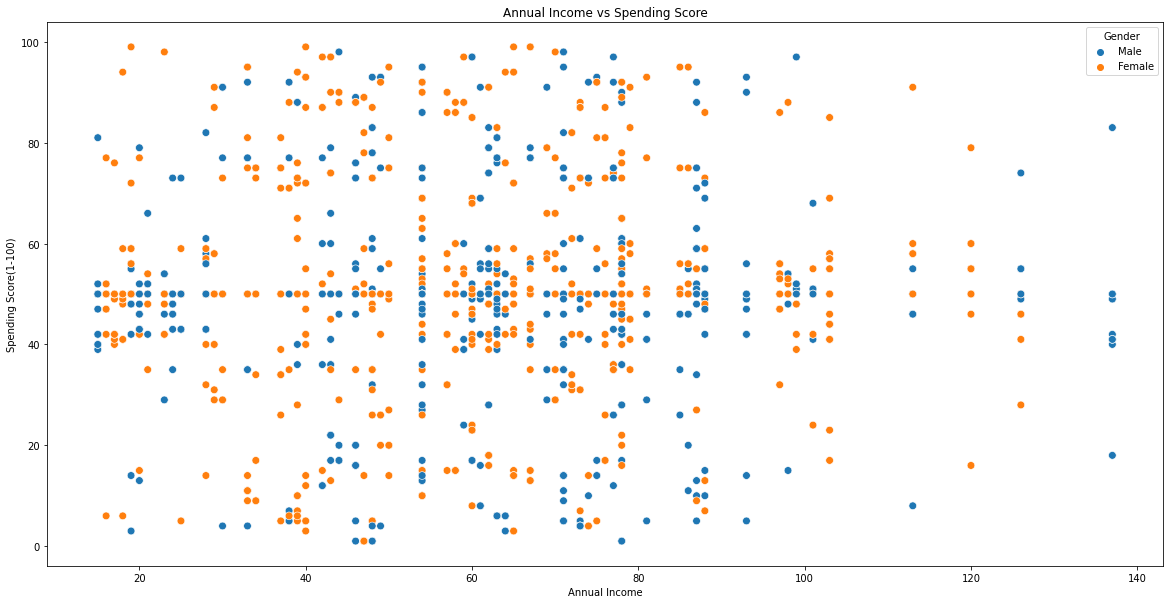

In [7]:
plt.rcParams['figure.figsize'] = (20,10)
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',hue='Gender',data=df,s=60)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score(1-100)')
plt.title('Annual Income vs Spending Score')
plt.show()

**1. From this scatterplot, we can see that there are some customer who have less income but spending more while there are some customer who have high income but spending less.**

**2. As a result, there is no relation forming between income and spending score.**

In [8]:
df['Gender'].value_counts()

Female    659
Male      521
Name: Gender, dtype: int64

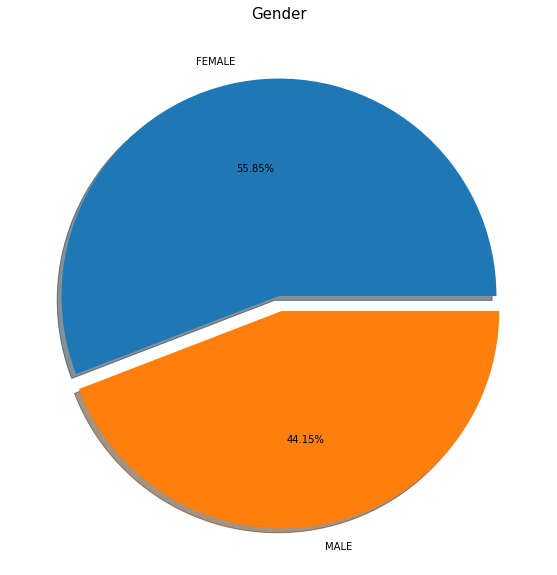

In [9]:
plt.pie(x=df['Gender'].value_counts(),explode = [0,0.07],labels=['FEMALE','MALE'],shadow=True,autopct='%.2f%%')
plt.title('Gender',fontsize = 15)
plt.show()

**From the above pie chart we can see that female customers are slightly higher than male customers.From this we can predict that the mall is selling more products which are mostly used by female like beauty products, household products etc.**

In [10]:
df.groupby('Gender').mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,,
Female,585.886191,37.836115,58.320182,51.262519
Male,596.335893,37.570058,61.506718,48.679463


**1. Average age of female is 38 while the average age of male is 37.**

**2. Average annual income of male is greater than that of female but when it comes to spending the average spending score of female is slightly greater than male.**

In [11]:
age = df['Age'].value_counts().sort_index().index
print(age)

Int64Index([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
            52, 53, 54, 55, 56, 57, 58, 59, 60, 63, 64, 65, 66, 67, 68, 69,
            70],
           dtype='int64')


In [12]:
# age18_19 = len(df.Age[(df.Age <= 19) & (df.Age >= 18)])
# age20_29 = len(df.Age[(df.Age <= 29) & (df.Age >= 20)])
# age30_39 = len(df.Age[(df.Age <= 39) & (df.Age >= 30)])
# age40_49 = len(df.Age[(df.Age <= 49) & (df.Age >= 40)])
# age50_59 = len(df.Age[(df.Age <= 59) & (df.Age >= 50)])
# age60_69 = len(df.Age[(df.Age <= 69) & (df.Age >= 60)])
# age70_above = len(df.Age[df.Age >= 70])

# x = ['18-19','20-29','30-39','40-49','50-59','60-69','70-above']
# y = [age18_19,age20_29,age30_39,age40_49,age50_59,age60_69,age70_above]

# sns.set_theme(style='whitegrid')
# plt.bar(x=x,height=y,color=['red','green','blue','yellow','orange','black','brown'])
# plt.xlabel('Ages')
# plt.ylabel('No. of customers')
# plt.title('Distribution of customers according to age')
# plt.show()

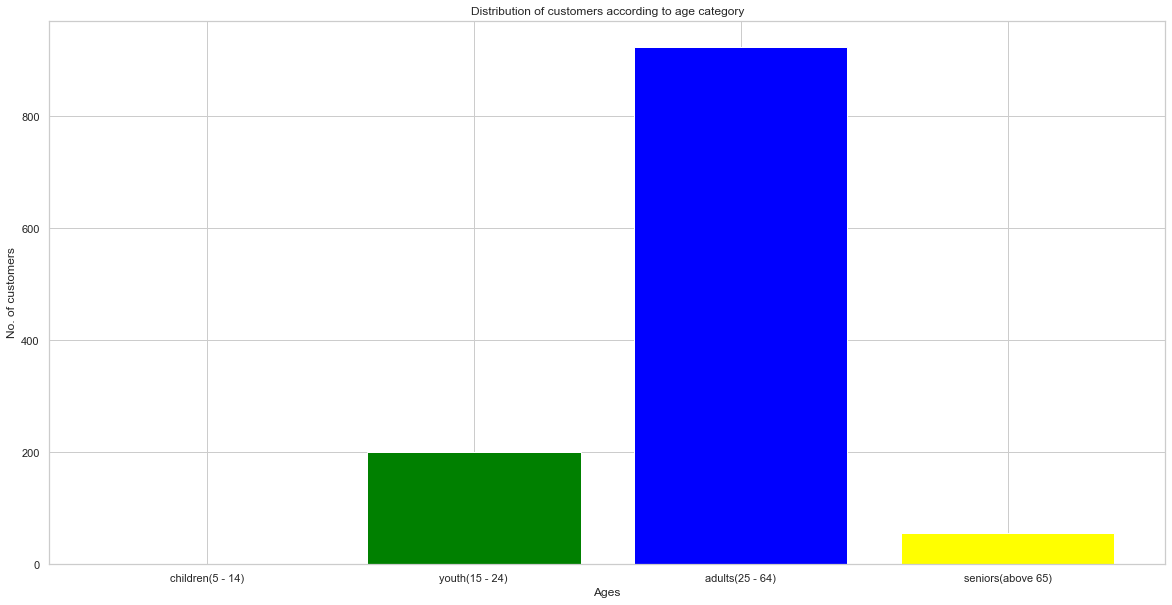

In [13]:
children = len(df.Age[(df.Age > 5) & (df.Age <= 14)])
youth = len(df.Age[(df.Age >= 15) & (df.Age <= 24)])
adults = len(df.Age[(df.Age >= 25) & (df.Age <= 64)])
seniors = len(df.Age[df.Age>= 65])

x = ['children(5 - 14)','youth(15 - 24)','adults(25 - 64)','seniors(above 65)']
y = [children,youth,adults,seniors]

sns.set_theme(style='whitegrid')
plt.bar(x=x,height=y,color=['red','green','blue','yellow'])
plt.xlabel('Ages')
plt.ylabel('No. of customers')
plt.title('Distribution of customers according to age category')
plt.show()

**I have categorized age into 4 different categories i.e. Children, Youth, Adult, Seniors.**
**From the above bar graph, we can get clear understanding that adult people whose age ranges from 25 to 64 are the most frequent customers while senior people are the less frequent customers.**
**Youth people are coming in the mall but not that frequent.**

In [14]:
df['Annual Income (k$)'].unique()

array([ 15,  16,  17,  18,  19,  20,  21,  23,  24,  25,  28,  29,  30,
        33,  34,  37,  38,  39,  40,  42,  43,  44,  46,  47,  48,  49,
        50,  54,  57,  58,  59,  60,  61,  62,  63,  64,  65,  67,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  85,  86,
        87,  88,  93,  97,  98,  99, 101, 103, 113, 120, 126, 137],
      dtype=int64)

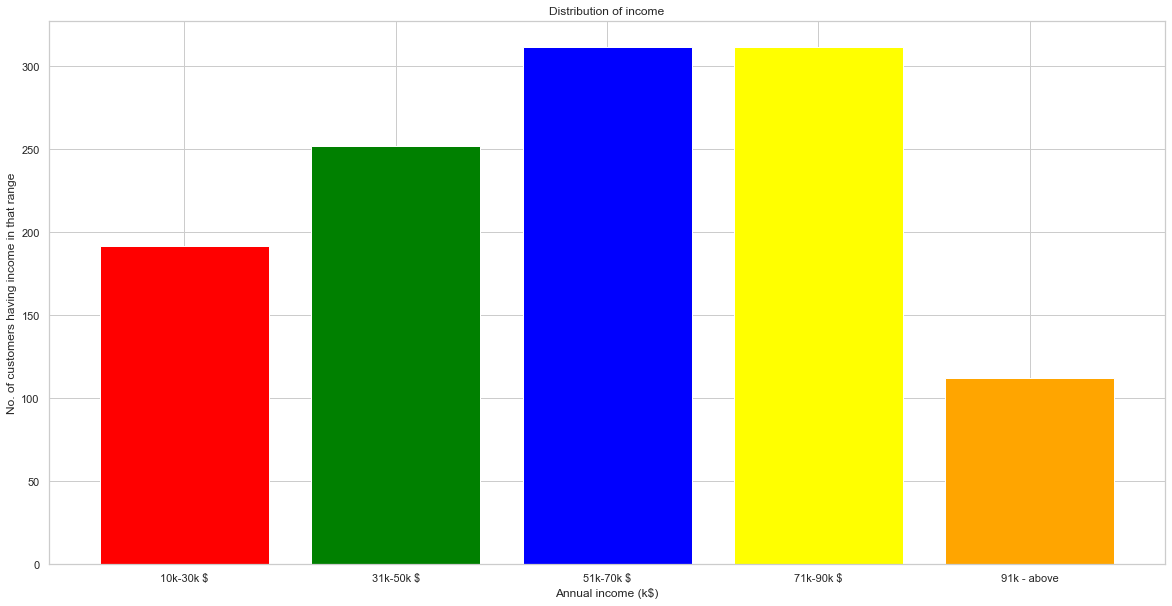

In [15]:
income10_30 = len(df['Annual Income (k$)'][(df['Annual Income (k$)'] > 10) & (df['Annual Income (k$)'] <= 30)])
income31_50 = len(df['Annual Income (k$)'][(df['Annual Income (k$)'] > 30) & (df['Annual Income (k$)'] <= 50)])
income51_70 = len(df['Annual Income (k$)'][(df['Annual Income (k$)'] > 50) & (df['Annual Income (k$)'] <= 70)])
income71_90 = len(df['Annual Income (k$)'][(df['Annual Income (k$)'] > 70) & (df['Annual Income (k$)'] <= 90)])
income91_above = len(df['Annual Income (k$)'][df['Annual Income (k$)'] > 90])

x = ['10k-30k $','31k-50k $','51k-70k $','71k-90k $','91k - above']
y = [income10_30,income31_50,income51_70,income71_90,income91_above]

sns.set_theme(style='whitegrid')
plt.bar(x=x,height=y,color=['red','green','blue','yellow','orange','black','brown'])
plt.xlabel('Annual income (k$)')
plt.ylabel('No. of customers having income in that range')
plt.title('Distribution of income')
plt.show()

**From the above graph, we get an idea about distribution of annual income of the customers. Most of the customers are having an income range lying between 31,000 dollar to 90,000 dollar while very few customers are having annual income above
90,000 dollar**

In [16]:
age = df['Spending Score (1-100)'].value_counts().sort_index().index
print(age)

Int64Index([ 1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
            20, 22, 23, 24, 26, 27, 28, 29, 31, 32, 34, 35, 36, 39, 40, 41, 42,
            43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59,
            60, 61, 63, 65, 66, 68, 69, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81,
            82, 83, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99],
           dtype='int64')


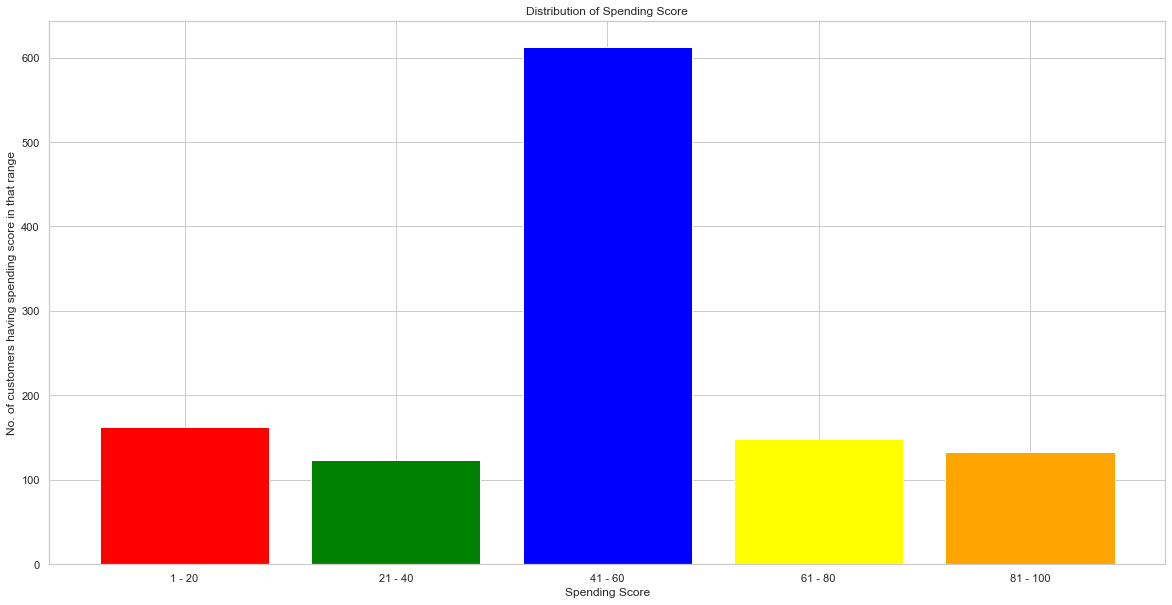

In [17]:
sScore1_20  = len(df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 1) & (df['Spending Score (1-100)'] <= 20)])
sScore21_40 = len(df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 21) & (df['Spending Score (1-100)'] <= 40)])
sScore41_60 = len(df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 41) & (df['Spending Score (1-100)'] <= 60)])
sScore61_80 = len(df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 61) & (df['Spending Score (1-100)'] <= 80)])
sScore81_100 = len(df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 81) & (df['Spending Score (1-100)'] <= 100)])

x = ['1 - 20','21 - 40','41 - 60','61 - 80','81 - 100']
y = [sScore1_20,sScore21_40,sScore41_60,sScore61_80,sScore81_100]

sns.set_theme(style='whitegrid')
plt.bar(x=x,height=y,color=['red','green','blue','yellow','orange','black','brown'])
plt.xlabel('Spending Score')
plt.ylabel('No. of customers having spending score in that range')
plt.title('Distribution of Spending Score')
plt.show()

**From this graph, we can observe that most of the customers are having a spending score between 41 and 60. Also there are some customers whose spending scores are greater than 80.**

In [18]:
df['City'].value_counts()

Los Angeles.     135
Chicago.         135
Houston.         135
Phoenix.         135
Philadelphia.    135
San Antonio.     135
San Diego        134
Washington       100
New York          68
Seattle           68
Name: City, dtype: int64

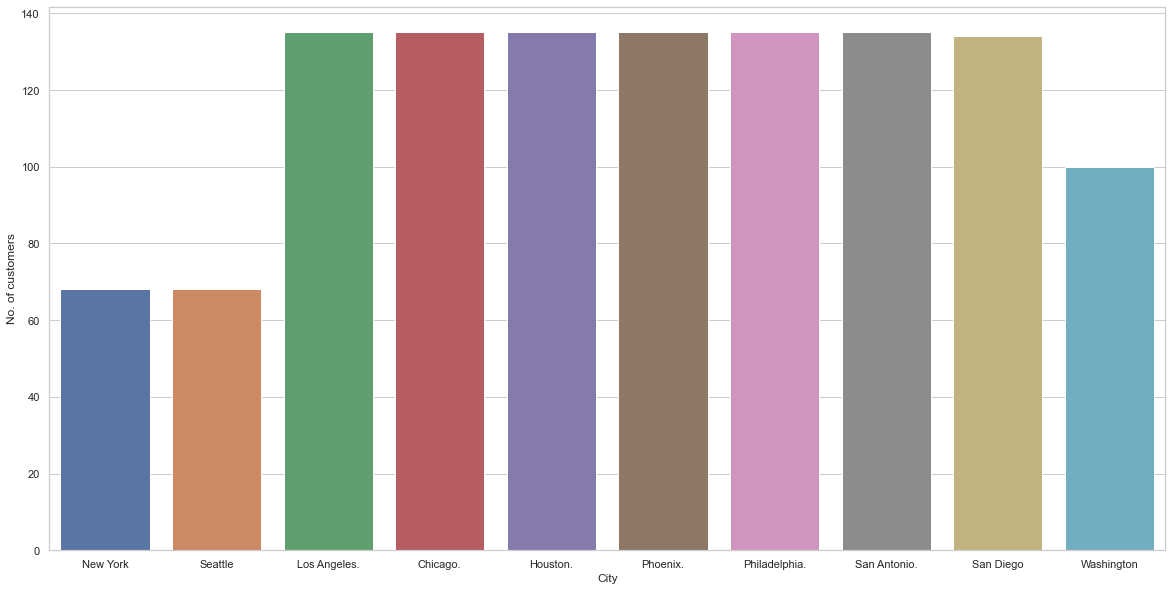

In [19]:
sns.countplot(x='City',data=df)
plt.xlabel('City')
plt.ylabel('No. of customers')
plt.show()

     1. Most of the customers are from Los Angeles, Chicago, Houston, Phoenix, Philadelphia, San Antonio and San Diego.
     2. Very few customers are from New York and Seattle.

### Training the ML model

* Since the data is not having any label, we can't train our model using Supervised ML algorithm.Hence, using K-Means is the best possible way.
* K-Means Clustering is an unsupervised machine learnig algorithm which group unlabel data set ito different cluster. It is centroid based algorithm where the main objective is to combine the data point which are very close to the centroid of the particular cluster

In [20]:
x1 = df[['Annual Income (k$)','Spending Score (1-100)']]

In [21]:
from sklearn.cluster import KMeans

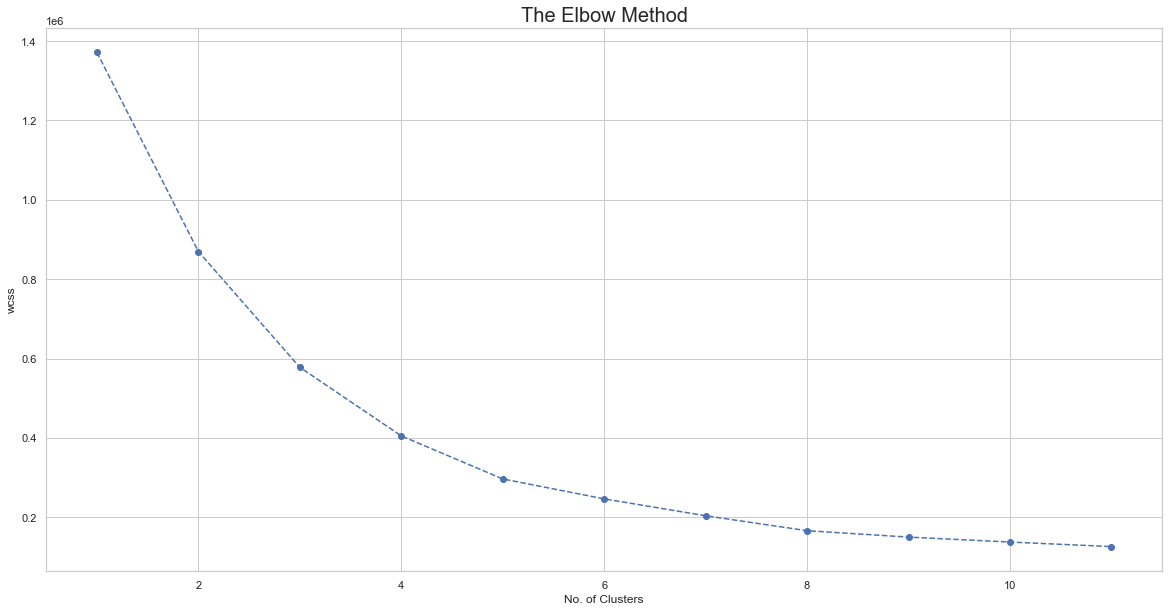

In [22]:
wcss = []
for i in range(1,12):
    km1 = KMeans(n_clusters=i,max_iter=400)
    km1.fit(x1)
    wcss.append(km1.inertia_)

plt.plot(range(1, 12),wcss,'o--')
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [23]:
km1 = KMeans(n_clusters=5,max_iter=400)
y_predict = km1.fit_predict(x1)

In [24]:
km1.cluster_centers_

array([[ 26.91935484,  48.60080645],
       [ 56.74678112,  82.75536481],
       [ 56.80107527,  13.24731183],
       [100.12      ,  51.29714286],
       [ 66.55029586,  48.4260355 ]])

In [25]:
df['label'] = y_predict

In [26]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),City,label
0,1,Male,19,15,39,New York,0
1,2,Male,21,15,81,Seattle,0
2,3,Female,20,16,6,Los Angeles.,2
3,4,Female,23,16,77,Chicago.,0
4,5,Female,31,17,40,Houston.,0
...,...,...,...,...,...,...,...
1175,1176,Female,47,88,73,Chicago.,3
1176,1177,Male,48,88,10,Houston.,2
1177,1178,Male,49,88,72,Phoenix.,3
1178,1179,Male,50,93,5,Philadelphia.,2


In [27]:
label_0 = df.label[df.label == 0]
label_1 = df.label[df.label == 1]
label_2 = df.label[df.label == 2]
label_3 = df.label[df.label == 3]
label_4 = df.label[df.label == 4]

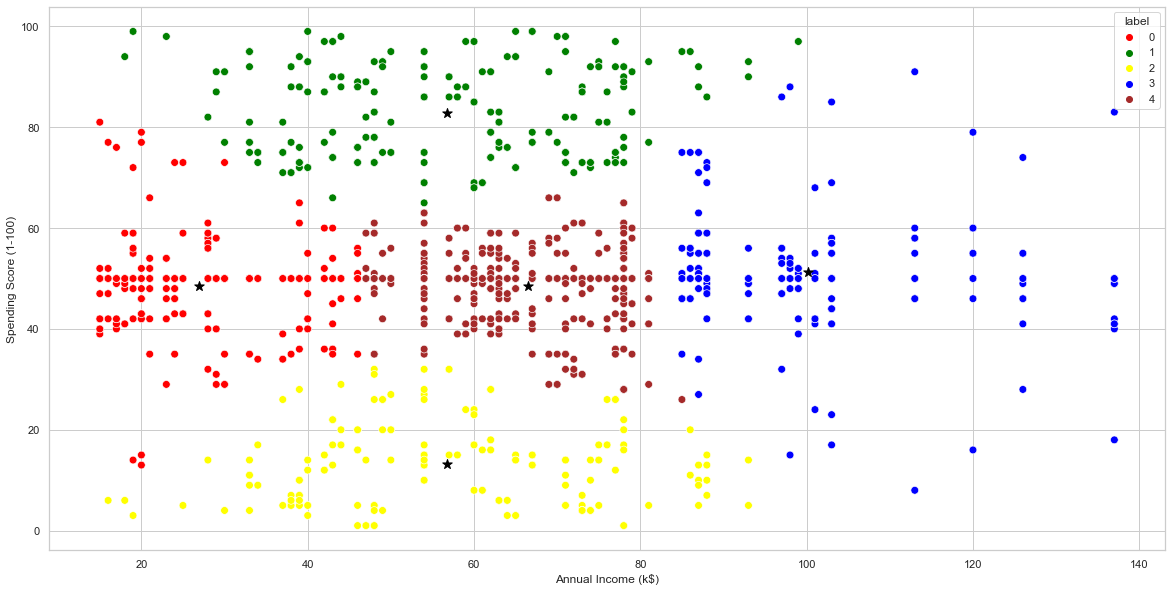

In [30]:
palette = ['Red','Green','Yellow','Blue','Brown']
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',hue='label',palette=palette,s=60,data=df)
plt.scatter(x=km1.cluster_centers_[:,0],y=km1.cluster_centers_[:,1],c='Black',s=100,label='Centroid',marker='*')
plt.show()

* From the above scatterplot, we can see that there are 5 different clusters.
* Miser(yellow) -- Customer whose annual income is good but spends as little as possible.
* Spendthrift(red) -- Customer who spends a lot of money
* 
* 
* Target Customers(brown) -- Customers whose annual income is very high and the spending score is also good.We have to target these customers to spend more by giving them discount, buy 1 get 1 offers and many other offers.